In [4]:
print("Hello, AI studio! :D")

Hello, AI studio! :D


## Milestone 2:

**Goals**: EDA on pre-experiment data & present EDA findings and data preprocessing.


### Task 2

Load the pre-experiment dataset and perform initial exploration to understand its structure and features.

In [5]:
# Step 1: Uploading the parquet file.

from google.colab import files

uploaded = files.upload()

Saving pre_experiment_data.parquet to pre_experiment_data.parquet


In [34]:
# Step 2: Performing initial exploration to understand its attributes.

import pandas as pd

df = pd.read_parquet("pre_experiment_data.parquet")

print("Head (10 Rows): \n")
print(df.head(10))
print("\n")

print("Info: \n")
print(df.info())
print("\n")

print("Columns: \n")
print(df.columns)
print("\n")

print("Shape: \n")
print(df.shape)
print("\n")

print("Attributes: \n")
print(df.describe())
print("\n")

Head (10 Rows): 

                            customer_id              name  aov (t-1)  \
0  b36ac04d-8855-4a1f-9c5f-d82006747e38    Makayla Miller     107.32   
1  c1bdefa8-dd48-4b27-be7e-18234975d9fc      Joshua Haley     183.86   
2  a006499f-89d6-4220-9cec-8b1655a6a76f    Jennifer Moore     109.28   
3  05e2d4f8-16b1-481f-8460-8ae8e112e23b      Misty Zamora     101.43   
4  6870cf65-b5ae-4f84-92ef-61004c68e0a8     Noah Williams     232.89   
5  d73b54bf-bae5-4cc4-bf05-7ae9fb281c5b    Terry Hale PhD      87.25   
6  d47271ea-d350-4346-9cdb-4a8f278611e0  Mr. Noah Salinas      63.18   
7  5cea11d3-87bf-45a6-b361-35f6600c9e35      Jose Rowland     133.57   
8  29f63384-53a3-4bc2-af5a-e401e9eadf43   Morgan Evans MD      63.71   
9  73e5c5bb-2ed5-4a8a-ab5e-1c85e712da66    Tasha Johnston     233.33   

   days_since_last_purchase (t-1)  tenure_in_days(t-1)  loyalty_membership  \
0                              16                   13                   0   
1                              26

### Task 3

Conduct data cleaning and preprocessing, including handling missing values, addressing outliers, encoding categorical variables, and normalizing numerical features

In [35]:
# Step 1: Checking for missing values.
df.isnull().sum()

,0
customer_id,0
name,0
aov (t-1),0
days_since_last_purchase (t-1),0
tenure_in_days(t-1),0
loyalty_membership,0
revenue (t),0


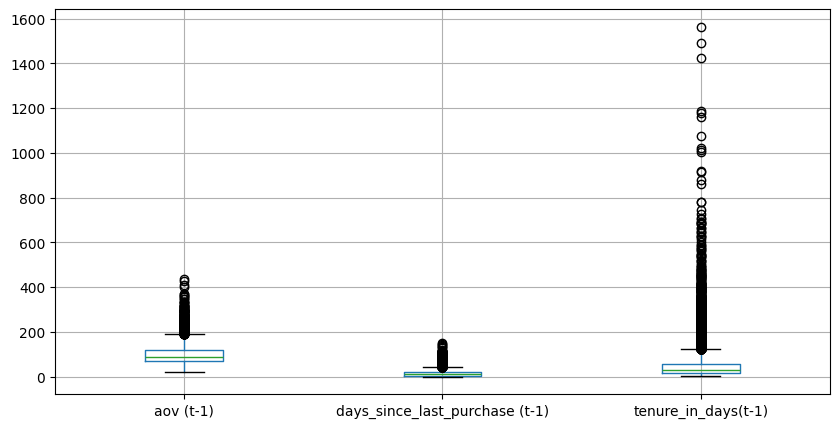

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 Checking for ourliers through boxplot visualization.
number_columns = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']
df[number_columns].boxplot(figsize=(10, 5))
plt.show()

The boxplot above shows slight ourliers in the numeric columns, for aove (t-1) above 200 mark. There are longer gaps in days for the days_since_last_purchase (t-1) feature of around 30-40 days. There are beyond 1000 days for the tenure_in_days(t-1). This represents actual customer behavior and there could gaps between purchase, longer periods of tenure, and higher amounts of spending. These points will be kept since they represent potential customer behavior. They should be monitored during modelling to make sure they don't overly influence results.

In [37]:
from sklearn.preprocessing import StandardScaler

# Step 1: Normalizing numerical features.
scaler = StandardScaler()
columns_to_scale = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

### Task 4

Task 4: Perform Exploratory Data Analysis (EDA) using summary statistics and visualizations to identify key patterns and relationships in the pre-experiment data.

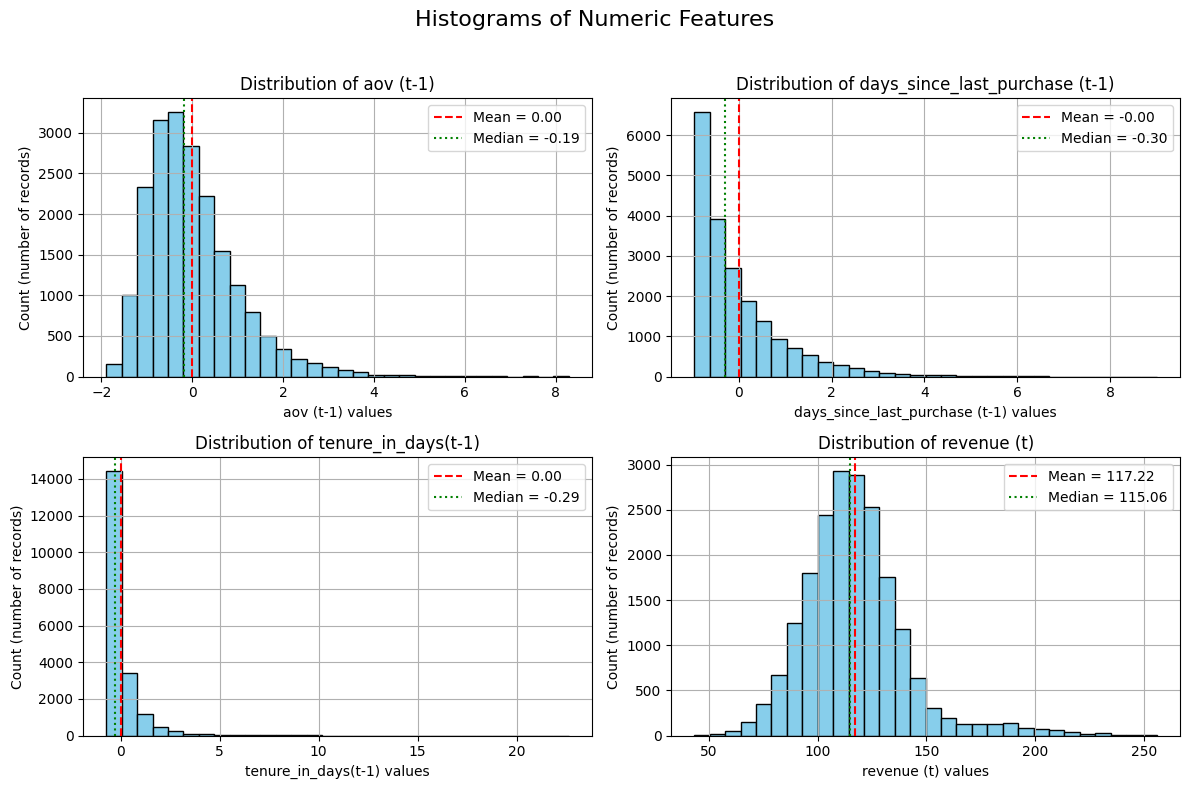

In [38]:
# Step 1: Distribution of Numeric Features
# This helps us understand the spread, skewness, and general shape of the data

# features we want to explore
features = ['aov (t-1)',
            'days_since_last_purchase (t-1)',
            'tenure_in_days(t-1)',
            'revenue (t)']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of histograms
axes = axes.flatten()  # flatten to make indexing easier

for i, col in enumerate(features):
    ax = axes[i]

    # plot histogram
    df[col].hist(ax=ax, bins=30, color="skyblue", edgecolor="black")

    # add labels
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(f"{col} values")   # x-axis → values of the feature
    ax.set_ylabel("Count (number of records)")  # y-axis → frequency

    # add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    ax.axvline(median_val, color="green", linestyle="dotted", linewidth=1.5, label=f"Median = {median_val:.2f}")
    ax.legend()

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The histograms show that AOV gradually declines, suggesting customers spend less per order over time, while days since last purchase and tenure are highly right-skewed, reflecting churn (many customers lapse quickly while a few remain for a long time). In contrast, revenue forms a bell-shaped curve, indicating most customers spend around an average level, with fewer low- and high-spending outliers.

/tmp/ipython-input-657508800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyalty_membership', data=df, palette="Set2")


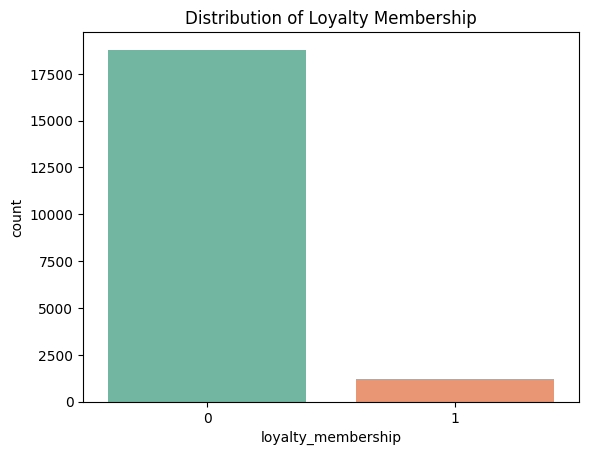

In [39]:
# Step 2: Distribution of Loyalty Membership
# Shows how many customers are in the loyalty program (0 = non-member, 1 = member)

sns.countplot(x='loyalty_membership', data=df, palette="Set2")
plt.title("Distribution of Loyalty Membership")
plt.show()

The distribution shows that the majority of customers are not in the loyalty program, with around 17,500 non-members compared to fewer than 2,500 members. This highlights a strong imbalance between the two groups. It suggests that loyalty membership adoption is relatively low and may play a distinct role in customer behavior analysis.

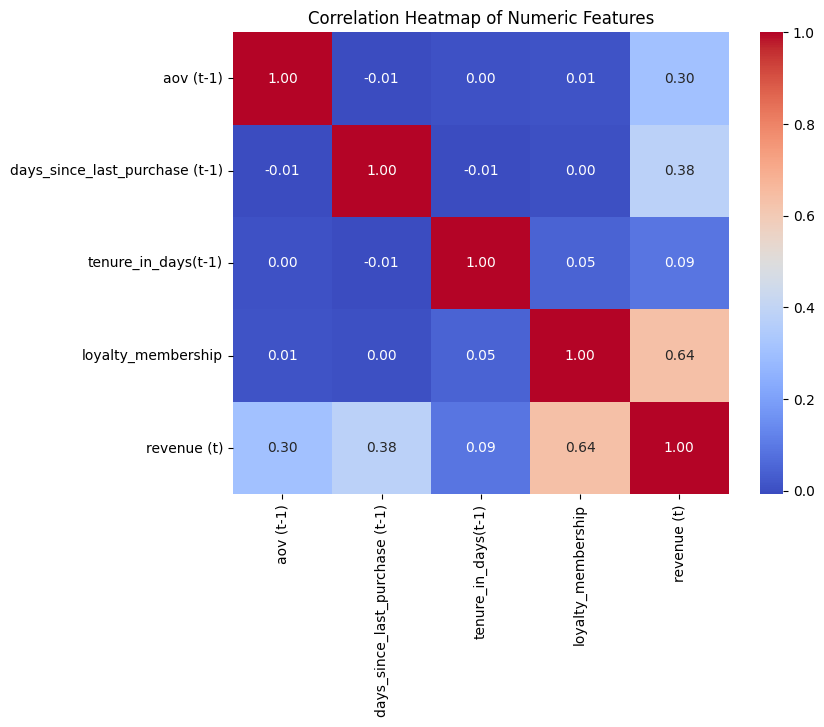

In [40]:
# Step 3: Relationships Between Numeric Features
# This helps identify which variables are strongly related to each other
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation heatmap shows that each variable is perfectly correlated with itself (diagonal red), as expected. There is a mild positive correlation between past average order value (aov (t-1)) and current revenue (revenue (t)), suggesting higher past spending is associated with higher current revenue. The moderate positive correlation between days_since_last_purchase and the revenue suggests that customers who had longer gaps since their last purchase in the previous period tend to have higher revenue in the current period. In addition, loyalty membership seems to contribute to higher revenue. On the other hand, the number of days a customer has been transacting business with the company (tenure_in_days(t-1)) has an almost neglibile effect on the revenue.

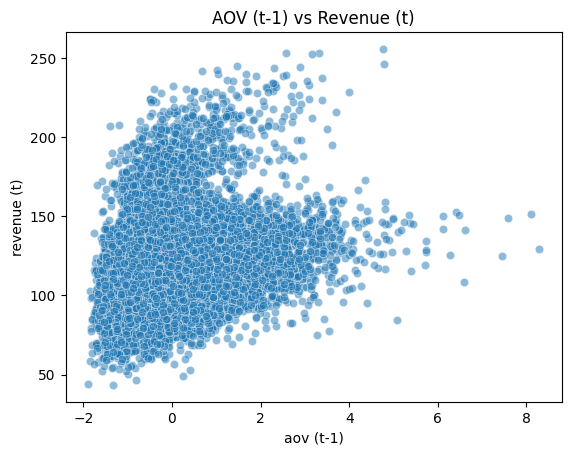

In [41]:
# Step 4: AOV vs Revenue
# Scatterplot to see if customers with higher past average order value (aov) also have higher revenue in the current period
sns.scatterplot(x='aov (t-1)', y='revenue (t)', data=df, alpha=0.5)
plt.title("AOV (t-1) vs Revenue (t)")
plt.show()

The scatterplot shows that most customers made purchases recently, around 4 days since their last purchase, and these recent buyers include some of the highest revenue contributors. The dark cluster of points indicates a high density of observations in this range. Fewer customers have longer gaps between purchases, and these tend to generate lower revenue, highlighting the importance of recency in driving sales.

/tmp/ipython-input-3230388636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loyalty_membership', y='revenue (t)', data=df, palette="Set3")


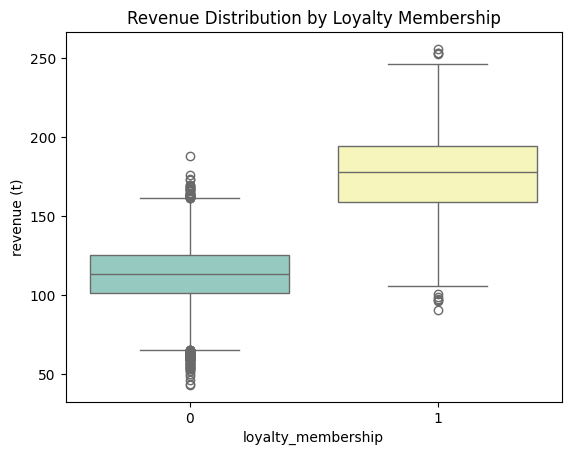

In [42]:
# Step 5: Revenue by Loyalty Membership
# Boxplot to compare revenue distribution between members and non-members
sns.boxplot(x='loyalty_membership', y='revenue (t)', data=df, palette="Set3")
plt.title("Revenue Distribution by Loyalty Membership")
plt.show()

The boxplot shows that loyalty members generate higher revenue than non-members, with a median around $175 compared to $110 for non-members. This indicates that membership is associated with increased spending. While there is some variation within each group, the key insight is that loyalty membership correlates with higher customer revenue.

In [43]:
# Step 6: Average Revenue and AOV by Loyalty Status
# Provides numerical evidence for differences between loyalty members and non-members
print("Average revenue by loyalty membership:\n", df.groupby('loyalty_membership')['revenue (t)'].mean(), "\n")
print("Average AOV (t-1) by loyalty membership:\n", df.groupby('loyalty_membership')['aov (t-1)'].mean(), "\n")

Average revenue by loyalty membership:
 loyalty_membership
0    113.354800
1    177.464888
Name: revenue (t), dtype: float64 

Average AOV (t-1) by loyalty membership:
 loyalty_membership
0   -0.002974
1    0.046301
Name: aov (t-1), dtype: float64 



The numerical analysis confirms that loyalty members are higher-value customers. On average, members generate \$177 in revenue compared to \$113 for non-members, and they also had slightly higher past average order values. This reinforces the insight that loyalty membership is associated with increased spending and customer value.


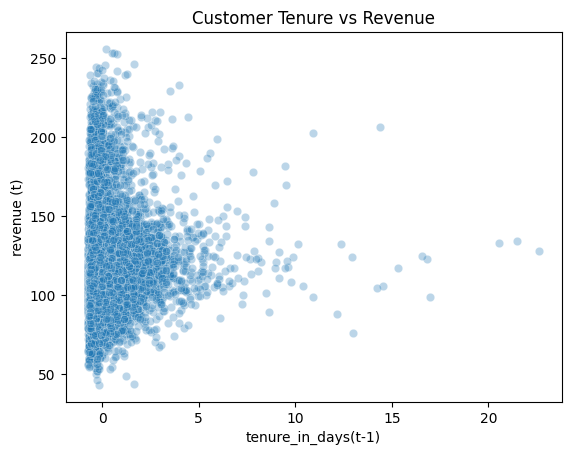

In [44]:
# Step 7: Tenure vs Revenue
# Helps see if long-term customers contribute more revenue
sns.scatterplot(x='tenure_in_days(t-1)', y='revenue (t)', data=df, alpha=0.3)
plt.title("Customer Tenure vs Revenue")
plt.show()

The scatterplot shows that most customers have short tenure, with a high density of points around 5 days. Interestingly, some new customers generate very high revenue, while long-term customers are fewer and tend to have moderate revenue. This suggests that both new and loyal customers contribute to revenue, but the majority of the dataset consists of recent customers.